In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [116]:
#df.drop(columns=['PM10_mask','Retrospective','Year'],inplace=True)
#df['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
#df.shape

In [117]:
df.drop(columns=['PM10_mask','Retrospective'],inplace=True)

In [118]:
df

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
23809,2019,2,7,4,42.0
23810,2019,2,7,5,33.0
23811,2019,2,7,6,37.0
23812,2019,2,7,7,40.0


In [119]:
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)

In [120]:
df

,Year,Month,Day,Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
23809,2019,2,7,4,42.0
23810,2019,2,7,5,33.0
23811,2019,2,7,6,37.0
23812,2019,2,7,7,40.0


In [121]:
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)

In [122]:
df

,Year,Month,Day,Hour,PM2.5,datetime
0,2016,3,3,8,62.9,2016-03-03 15:00:00
1,2016,3,3,9,62.9,2016-03-03 16:00:00
2,2016,3,3,10,55.5,2016-03-03 17:00:00
3,2016,3,3,11,55.5,2016-03-03 18:00:00
4,2016,3,3,12,47.9,2016-03-03 19:00:00
...,...,...,...,...,...,...
23809,2019,2,7,4,42.0,2019-02-07 11:00:00
23810,2019,2,7,5,33.0,2019-02-07 12:00:00
23811,2019,2,7,6,37.0,2019-02-07 13:00:00
23812,2019,2,7,7,40.0,2019-02-07 14:00:00


In [123]:
df.index = df['datetime']

In [124]:
df

,Year,Month,Day,Hour,PM2.5,datetime
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,2016-03-03 19:00:00
...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,4,42.0,2019-02-07 11:00:00
2019-02-07 12:00:00,2019,2,7,5,33.0,2019-02-07 12:00:00
2019-02-07 13:00:00,2019,2,7,6,37.0,2019-02-07 13:00:00


In [125]:
df.Hour = df.index.hour

In [126]:
df

,Year,Month,Day,Hour,PM2.5,datetime
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,2016-03-03 19:00:00
...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,2019-02-07 11:00:00
2019-02-07 12:00:00,2019,2,7,12,33.0,2019-02-07 12:00:00
2019-02-07 13:00:00,2019,2,7,13,37.0,2019-02-07 13:00:00


In [127]:
df["PM2.5"] <= 50

datetime
2016-03-03 15:00:00    False
2016-03-03 16:00:00    False
2016-03-03 17:00:00    False
2016-03-03 18:00:00    False
2016-03-03 19:00:00     True
                       ...  
2019-02-07 11:00:00     True
2019-02-07 12:00:00     True
2019-02-07 13:00:00     True
2019-02-07 14:00:00     True
2019-02-07 15:00:00     True
Name: PM2.5, Length: 23814, dtype: bool

In [128]:
df[df["PM2.5"] <= 50]

,Year,Month,Day,Hour,PM2.5,datetime
datetime,,,,,,
2016-03-03 19:00:00,2016,3,3,19,47.9,2016-03-03 19:00:00
2016-03-03 20:00:00,2016,3,3,20,43.6,2016-03-03 20:00:00
2016-03-03 21:00:00,2016,3,3,21,28.6,2016-03-03 21:00:00
2016-03-03 22:00:00,2016,3,3,22,33.6,2016-03-03 22:00:00
2016-03-03 23:00:00,2016,3,3,23,34.8,2016-03-03 23:00:00
...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,2019-02-07 11:00:00
2019-02-07 12:00:00,2019,2,7,12,33.0,2019-02-07 12:00:00
2019-02-07 13:00:00,2019,2,7,13,37.0,2019-02-07 13:00:00


In [129]:
sum(df["PM2.5"] <= 50)

22006

In [130]:
df[(df['PM2.5'] > 50) & (df["PM2.5"] <=100)]["PM2.5"]

datetime
2016-03-03 15:00:00    62.9
2016-03-03 16:00:00    62.9
2016-03-03 17:00:00    55.5
2016-03-03 18:00:00    55.5
2016-03-23 04:00:00    54.2
                       ... 
2019-02-02 23:00:00    51.0
2019-02-03 00:00:00    54.0
2019-02-03 01:00:00    55.0
2019-02-03 12:00:00    51.0
2019-02-04 18:00:00    51.0
Name: PM2.5, Length: 1717, dtype: float64

In [131]:
(df['PM2.5'] > 50) & (df["PM2.5"] <=100)

datetime
2016-03-03 15:00:00     True
2016-03-03 16:00:00     True
2016-03-03 17:00:00     True
2016-03-03 18:00:00     True
2016-03-03 19:00:00    False
                       ...  
2019-02-07 11:00:00    False
2019-02-07 12:00:00    False
2019-02-07 13:00:00    False
2019-02-07 14:00:00    False
2019-02-07 15:00:00    False
Name: PM2.5, Length: 23814, dtype: bool

In [132]:
df[df["PM2.5"]>100]["PM2.5"]

datetime
2017-03-03 09:00:00    115.4
2018-01-22 08:00:00    103.4
2018-01-22 09:00:00    100.8
2018-02-08 10:00:00    114.3
2018-02-14 08:00:00    104.1
                       ...  
2019-01-31 16:00:00    106.0
2019-02-01 02:00:00    104.0
2019-02-01 03:00:00    118.0
2019-02-01 04:00:00    121.0
2019-02-01 05:00:00    103.0
Name: PM2.5, Length: 91, dtype: float64

In [133]:
PM = []
for row in df["PM2.5"]:
    if row <= 50:
        PM.append("Low")
    elif row <= 100:
        PM.append("Med")
    else:
        PM.append("High")

In [134]:
df["PM"] = PM

In [135]:
df.head()

,Year,Month,Day,Hour,PM2.5,datetime,PM
datetime,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,2016-03-03 15:00:00,Med
2016-03-03 16:00:00,2016,3,3,16,62.9,2016-03-03 16:00:00,Med
2016-03-03 17:00:00,2016,3,3,17,55.5,2016-03-03 17:00:00,Med
2016-03-03 18:00:00,2016,3,3,18,55.5,2016-03-03 18:00:00,Med
2016-03-03 19:00:00,2016,3,3,19,47.9,2016-03-03 19:00:00,Low


In [136]:
df

,Year,Month,Day,Hour,PM2.5,datetime,PM
datetime,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,2016-03-03 15:00:00,Med
2016-03-03 16:00:00,2016,3,3,16,62.9,2016-03-03 16:00:00,Med
2016-03-03 17:00:00,2016,3,3,17,55.5,2016-03-03 17:00:00,Med
2016-03-03 18:00:00,2016,3,3,18,55.5,2016-03-03 18:00:00,Med
2016-03-03 19:00:00,2016,3,3,19,47.9,2016-03-03 19:00:00,Low
...,...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,2019-02-07 11:00:00,Low
2019-02-07 12:00:00,2019,2,7,12,33.0,2019-02-07 12:00:00,Low
2019-02-07 13:00:00,2019,2,7,13,37.0,2019-02-07 13:00:00,Low


In [101]:
#################################
x1 = df[df["PM"] == "Low"].index
y1 = df[df["PM"] == "Low"]["PM2.5"]
ax.scatter(x1,y1,s=y1,label = 'Low',color = '#7CFC00')

x2 = df[df["PM"] == "Med"].index
y2 = df[df["PM"] == "Med"]["PM2.5"]
ax.scatter(x2,y2,s=y2,label = 'Med',color = '#FFA500')

x3 = df[df["PM"] == "High"].index
x3 = df[df["PM"] == "High"]["PM2.5"]
ax.scatter(x3,y3,s=y3,label = 'High',color = '#FF0000')

fig,ax = plt.subplots(figsize = (24,8))
plt.grid(True)
plt.scatter(x1,y1,s = y)
plt.scatter(x2,y2,s = y2)
plt.scatter(x3,y3,s = y3)
ax.legend()
plt.show()


NameError: name 'y3' is not defined

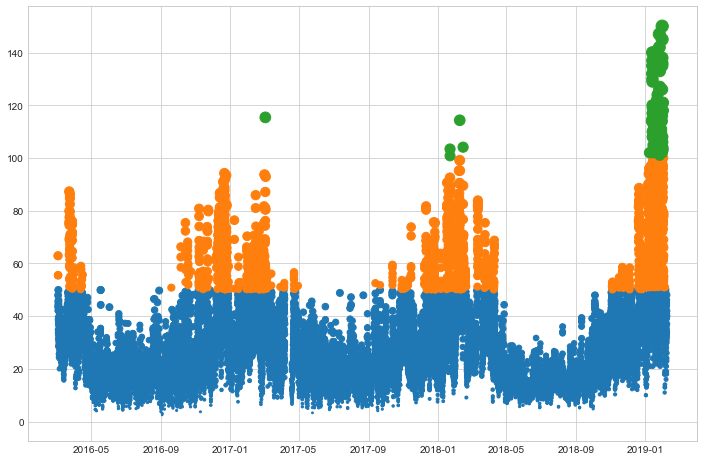

In [137]:
x = df[df["PM"] == "Low"].index
y = df[df["PM"] == "Low"]["PM2.5"]

a = df[df["PM"] == "Med"].index
b = df[df["PM"] == "Med"]["PM2.5"]

c = df[df["PM"] == "High"].index
d = df[df["PM"] == "High"]["PM2.5"]

# 0- 50 Low
# 50-100 Med
# 100-150 High

plt.figure(figsize = (12,8))
plt.grid(True)
plt.scatter(x,y,s = y)
plt.scatter(a,b,s = b)
plt.scatter(c,d,s = d)


In [138]:
print(df[df["PM"] == "High"]["PM"].count())
print(df[df["PM"] == "Med"]["PM"].count())
print(df[df["PM"] == "Low"]["PM"].count())

91
1717
22006


In [141]:
#pie chart
sizes = [75,35,15]
label = ["High" , "Med" , "Low"]

Text(0.5, 1.0, 'kanjanaphisek bangkok pm2.5')

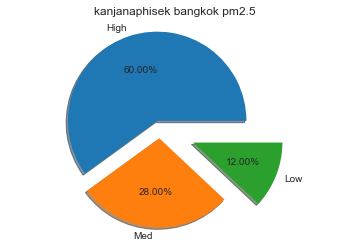

In [144]:
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.4)
ax.pie(sizes,explode = explode,labels = label, shadow=True, autopct='%1.2f%%')
ax.axis('equal') 
ax.set_title('kanjanaphisek bangkok pm2.5')

Text(0.5, 1.0, 'kanjanaphisek bangkok pm2.5')

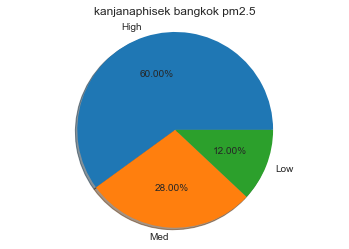

In [146]:
fig, ax = plt.subplots()
ax.pie(sizes,labels = label, shadow=True, autopct='%1.2f%%')
ax.axis('equal') 
ax.set_title('kanjanaphisek bangkok pm2.5')

In [147]:
df[df["PM"] == "Low"].index

DatetimeIndex(['2016-03-03 19:00:00', '2016-03-03 20:00:00',
               '2016-03-03 21:00:00', '2016-03-03 22:00:00',
               '2016-03-03 23:00:00', '2016-03-04 00:00:00',
               '2016-03-04 02:00:00', '2016-03-04 03:00:00',
               '2016-03-04 04:00:00', '2016-03-04 05:00:00',
               ...
               '2019-02-07 06:00:00', '2019-02-07 07:00:00',
               '2019-02-07 08:00:00', '2019-02-07 09:00:00',
               '2019-02-07 10:00:00', '2019-02-07 11:00:00',
               '2019-02-07 12:00:00', '2019-02-07 13:00:00',
               '2019-02-07 14:00:00', '2019-02-07 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=22006, freq=None)

In [148]:
df[df["PM"] == "Low"]

,Year,Month,Day,Hour,PM2.5,datetime,PM
datetime,,,,,,,
2016-03-03 19:00:00,2016,3,3,19,47.9,2016-03-03 19:00:00,Low
2016-03-03 20:00:00,2016,3,3,20,43.6,2016-03-03 20:00:00,Low
2016-03-03 21:00:00,2016,3,3,21,28.6,2016-03-03 21:00:00,Low
2016-03-03 22:00:00,2016,3,3,22,33.6,2016-03-03 22:00:00,Low
2016-03-03 23:00:00,2016,3,3,23,34.8,2016-03-03 23:00:00,Low
...,...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,2019-02-07 11:00:00,Low
2019-02-07 12:00:00,2019,2,7,12,33.0,2019-02-07 12:00:00,Low
2019-02-07 13:00:00,2019,2,7,13,37.0,2019-02-07 13:00:00,Low


In [149]:
df[df["PM"] == "Med"].index

DatetimeIndex(['2016-03-03 15:00:00', '2016-03-03 16:00:00',
               '2016-03-03 17:00:00', '2016-03-03 18:00:00',
               '2016-03-23 04:00:00', '2016-03-23 05:00:00',
               '2016-03-23 06:00:00', '2016-03-23 07:00:00',
               '2016-03-23 08:00:00', '2016-03-23 09:00:00',
               ...
               '2019-02-02 15:00:00', '2019-02-02 16:00:00',
               '2019-02-02 19:00:00', '2019-02-02 20:00:00',
               '2019-02-02 21:00:00', '2019-02-02 23:00:00',
               '2019-02-03 00:00:00', '2019-02-03 01:00:00',
               '2019-02-03 12:00:00', '2019-02-04 18:00:00'],
              dtype='datetime64[ns]', name='datetime', length=1717, freq=None)

In [150]:
df[df["PM"] == "Med"]

,Year,Month,Day,Hour,PM2.5,datetime,PM
datetime,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,2016-03-03 15:00:00,Med
2016-03-03 16:00:00,2016,3,3,16,62.9,2016-03-03 16:00:00,Med
2016-03-03 17:00:00,2016,3,3,17,55.5,2016-03-03 17:00:00,Med
2016-03-03 18:00:00,2016,3,3,18,55.5,2016-03-03 18:00:00,Med
2016-03-23 04:00:00,2016,3,22,4,54.2,2016-03-23 04:00:00,Med
...,...,...,...,...,...,...,...
2019-02-02 23:00:00,2019,2,2,23,51.0,2019-02-02 23:00:00,Med
2019-02-03 00:00:00,2019,2,2,0,54.0,2019-02-03 00:00:00,Med
2019-02-03 01:00:00,2019,2,2,1,55.0,2019-02-03 01:00:00,Med


In [151]:
df[df["PM"] == "High"].index

DatetimeIndex(['2017-03-03 09:00:00', '2018-01-22 08:00:00',
               '2018-01-22 09:00:00', '2018-02-08 10:00:00',
               '2018-02-14 08:00:00', '2019-01-08 02:00:00',
               '2019-01-11 05:00:00', '2019-01-12 05:00:00',
               '2019-01-12 06:00:00', '2019-01-13 04:00:00',
               '2019-01-13 05:00:00', '2019-01-13 06:00:00',
               '2019-01-13 07:00:00', '2019-01-13 08:00:00',
               '2019-01-13 09:00:00', '2019-01-13 10:00:00',
               '2019-01-13 11:00:00', '2019-01-13 12:00:00',
               '2019-01-13 13:00:00', '2019-01-13 14:00:00',
               '2019-01-13 15:00:00', '2019-01-13 16:00:00',
               '2019-01-13 17:00:00', '2019-01-14 13:00:00',
               '2019-01-14 14:00:00', '2019-01-14 15:00:00',
               '2019-01-14 16:00:00', '2019-01-15 03:00:00',
               '2019-01-15 04:00:00', '2019-01-15 05:00:00',
               '2019-01-20 14:00:00', '2019-01-20 15:00:00',
               '2019-01-

In [152]:
df[df["PM"] == "High"]

,Year,Month,Day,Hour,PM2.5,datetime,PM
datetime,,,,,,,
2017-03-03 09:00:00,2017,3,3,9,115.4,2017-03-03 09:00:00,High
2018-01-22 08:00:00,2018,1,22,8,103.4,2018-01-22 08:00:00,High
2018-01-22 09:00:00,2018,1,22,9,100.8,2018-01-22 09:00:00,High
2018-02-08 10:00:00,2018,2,8,10,114.3,2018-02-08 10:00:00,High
2018-02-14 08:00:00,2018,2,14,8,104.1,2018-02-14 08:00:00,High
...,...,...,...,...,...,...,...
2019-01-31 16:00:00,2019,1,31,16,106.0,2019-01-31 16:00:00,High
2019-02-01 02:00:00,2019,1,31,2,104.0,2019-02-01 02:00:00,High
2019-02-01 03:00:00,2019,1,31,3,118.0,2019-02-01 03:00:00,High


In [103]:
df = pd.pivot_table(df,index=['Year','PM2.5'])
df

Day  Hour  Month
Year PM2.5                   
2016 2.5     2.0  22.0    9.0
     2.9     2.0  23.0    9.0
     3.0     2.0  20.0    9.0
     3.2     2.0  19.0    9.0
     3.7     8.0   5.0   11.0
...          ...   ...    ...
2019 140.0  13.0   9.0    1.0
     142.0  25.0  15.0    1.0
     145.0  30.0  14.0    1.0
     147.0  25.0  14.0    1.0
     150.0  30.0  15.0    1.0

[2153 rows x 3 columns]

<AxesSubplot:title={'center':'kanjanaphisek bangkok pm2.5 Year-wise'}, xlabel='Year,PM2.5'>

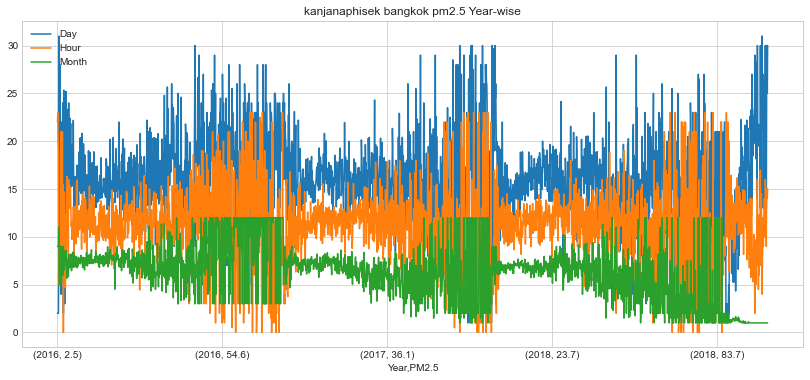

In [104]:
df.plot(title="kanjanaphisek bangkok pm2.5 Year-wise",figsize=(14,6), grid=True)

In [ ]:
##########################
pv = pd.pivot_table(df,index=['Year','PM2.5']), columns=df,index=['Year'],values ='PM2.5', aggfunc='mean')
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(df,index=['Year','PM2.5']), columns=df,index=['Year'],values ='PM2.5', aggfunc='max')
v2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

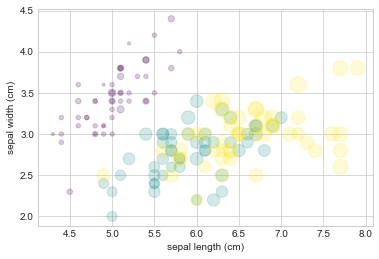

In [107]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [108]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [109]:
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

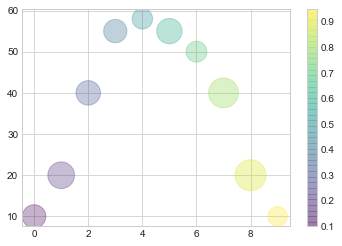

In [110]:
rng = np.random.RandomState(0)
sizes = 1000 * rng.rand(10)
x =  [0,1,2,3,4,5,6,7,8,9]
y = [10,20,40,55,58,55,50,40,20,10]
colors=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

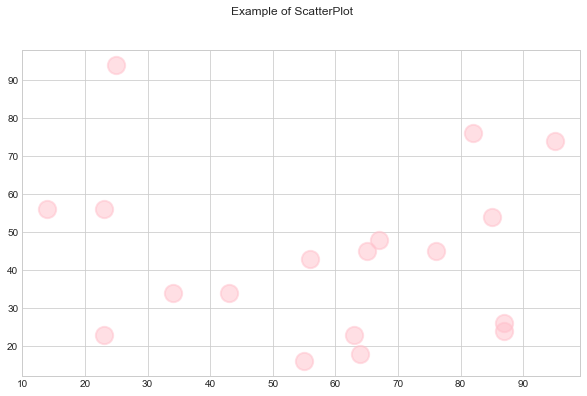

In [111]:
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,16,18,24,74,23,56,45,48,94,56,54]
fig ,ax = plt.subplots(1, figsize=(10,6))
fig.suptitle('Example of ScatterPlot')
ax.scatter(x,y,color = "pink",s = 300,alpha = 0.5,linewidth = 2)